In [1]:
import numpy as np
import scipy as sp
import matplotlib as plt

In [2]:
xx1 = np.linspace(-4, 4, 100)
xx2 = np.linspace(-4, -2, 100)
xx3 = np.linspace(2, 4, 100)

plt.subplot(3, 1, 1)
plt.fill_between(xx1, sp.stats.norm.pdf(xx1), facecolor='green', alpha=0.1)
plt.fill_between(xx2, sp.stats.norm.pdf(xx2), facecolor='blue', alpha=0.35)
plt.fill_between(xx3, sp.stats.norm.pdf(xx3), facecolor='blue', alpha=0.35)
plt.text(-3, 0.1, "p-value=%5.3f" % (2*sp.stats.norm.cdf(-2)), horizontalalignment='center')
plt.title(r"Test statistics = 2. Two-tailed test. $H_a: \mu \neq 0$")

plt.subplot(3, 1, 2)
plt.fill_between(xx1, sp.stats.norm.pdf(xx1), facecolor='green', alpha=0.1)
plt.fill_between(xx3, sp.stats.norm.pdf(xx3), facecolor='blue', alpha=0.35)
plt.text(3, 0.1, "p-value=%5.3f" % (sp.stats.norm.cdf(-2)), horizontalalignment='center')
plt.title(r"Test statistics = 2. One-tailed test. $H_a: \mu > 0$")

plt.subplot(3, 1, 3)
plt.fill_between(xx1, sp.stats.norm.pdf(xx1), facecolor='green', alpha=0.1)
plt.fill_between(xx2, sp.stats.norm.pdf(xx2), facecolor='blue', alpha=0.35)
plt.text(-3, 0.1, "p-value=%5.3f" % (sp.stats.norm.cdf(-2)), horizontalalignment='center')
plt.title(r"Test statistics = -2. One-tailed test. $H_a: \mu < 0$")

plt.tight_layout()
plt.show()

AttributeError: 'module' object has no attribute 'subplot'

In [4]:
from sklearn import datasets 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
iris=datasets.load_iris() 
df=pd.DataFrame(iris.data)

In [6]:
sns.distplot(df.iloc[:,0],fit=norm) 
plt.show() 
stats.probplot(df.iloc[:,0], plot=plt) 
plt.show()


NameError: name 'norm' is not defined

In [7]:
np.random.seed(0)
mu0 = 1
sigma0 = 2
x = sp.stats.norm(mu0, sigma0).rvs(1000)
xbar = x.mean()
s2 = x.std(ddof=1)
xbar, s2

(0.90948658501960922, 1.9750540913890255)

In [9]:
x = np.random.normal(np.random.uniform(0, 10), np.random.uniform(0, 10), 500)

In [11]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import ttest_ind
from scipy.optimize import minimize

# MLE에서 사용하기 위한 gaussian rv X의 pdf
def f_x(mu_sig):
    mu, sig = mu_sig[0], mu_sig[1]
    r = 1/(np.sqrt(2*np.pi*(sig**2))) * np.exp(-(x-mu)**2/(2*sig**2))
    r = np.log(r) 
    #np.log로 변환해주지 않으면, 값이 정확하게 예측되기 어려운데, 왜 그런지는....흠
    return -r.sum() # scipy.optimize에는 maximize밖에 없기 때문에, -를 곱해서 진행해주어야 함

# 랜덤의 평균/분산을 가지는 데이터를 생성합니다. 
x = np.random.normal(np.random.uniform(0, 10), np.random.uniform(0, 10), 500)

print("------------------")
print('method of moment')
print("mean: {:.3f}, std: {:.3f}".format(x.mean(), x.std()))

# 평균 추정하기
ms = np.linspace(x.mean()-x.std()/2, x.mean()+x.std()/2, 100)
ps = [] # p_values
m_by_MLE = 0 # 추정된 mean 값
max_p_value = 0 # 가장 큰 p_value값
for m in ms:
    # 평균을 바꾸어가면서, 두 분포의 평균이 같은지 p-value를 계산함
    p_value = ttest_ind(x, np.random.normal(m, 1, len(x))).pvalue
    ps.append(p_value)
    if p_value > max_p_value:# 더 큰 p_value가 나오면, 그 값을 가장 likelihood가 높은 경우로 고려함. 
        m_by_MLE = m
        max_p_value=p_value

print("------------------")
print('by p-value')
print("mean: {:.3f}".format(m_by_MLE))
print("------------------")

### MLE with numeric optimzation 
result = minimize(f_x, np.array([10, 10]))
mu_sigma = result['x']
print("by MLE, optimization")
print("mu: {:.2f}, sigma: {:.2f}".format(mu_sigma[0], mu_sigma[1]))
print("------------------")

------------------
method of moment
mean: 1.070, std: 7.052
------------------
by p-value
mean: 1.034
------------------
by MLE, optimization
mu: 1.07, sigma: 7.05
------------------


In [44]:
import numpy as np
from scipy import stats
 
#to get consistent result
np.random.seed(1)
 
#generate 20 random heights with mean of 180, standard deviation of 5
heights = [180 + np.random.normal(0, 5) for _ in range(200)]
 
#perform 1-sample t-test
tTestResult = stats.ttest_1samp(heights, 181)
 
#print result
print("The T-statistic is %.3f and the p-value is %.3f" % tTestResult)


The T-statistic is -1.446 and the p-value is 0.150


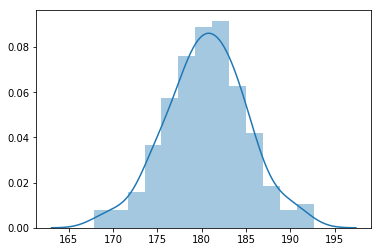

In [30]:
sns.distplot(heights)
#sns.distplot(heights, kde=False, fit=sp.stats.norm)
plt.show()

In [45]:
import statsmodels.api as sm


/Users/a1/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [46]:
 import statsmodels.formula.api as smf

In [47]:
dat = sm.datasets.get_rdataset("Guerry", "HistData").data

In [48]:
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()

In [51]:
print results.summary()

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Sun, 07 Oct 2018   Prob (F-statistic):           1.90e-08
Time:                        23:14:10   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233     